<div class="alert alert-info">
    <h1>Analysis of Saturn's F Ring During the Cassini Mission</h1>
    <h1>Analyze Occurrence of Bright Clumps</h1>

Robert S. French, rfrench@seti.org - Last updated April 10, 2024

Research performed under NASA Grant 80NSSC21K0527 for CDAP proposal "The Recent History of Saturn's Dusty Rings".
</div>


In [1]:
import colorsys
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Rectangle
import numpy as np
import numpy.ma as ma 
import pandas as pd
import sys
if '..' not in sys.path: sys.path.append('..'); sys.path.append('../external')
    
from f_ring_util.f_ring import (add_hover,
                                compute_corrected_ew, 
                                fit_hg_phase_function, 
                                hg_func,
                                limit_by_quant,
                                print_hg_params,
                                read_ew_stats,
                                scale_hg_phase_function)

%matplotlib widget
mpl.rcParams['figure.max_open_warning'] = 100
mpl.rcParams['figure.figsize'] = (10.5, 5)

# Utility Functions

In [2]:
def fill_in_missing_long(x, y):
    # This only works for cases where the longitudes are 1 degree apart
    new_x = np.arange(360.)
    new_y = ma.empty(new_x.shape)
    new_y[:] = ma.masked
    new_y[x.astype(int)] = y
    return new_x, new_y

def plot_color(n, of):
    return colorsys.hsv_to_rgb(n/(of-1)*2/3, 1, .75)

In [3]:
obsdata_0_1 = read_ew_stats('../data_files/cass_ew_0_1.csv',
                            obslist_filename='CASSINI_OBSERVATION_LIST',
                            obslist_column='For Photometry')
obsdata_60_0 = read_ew_stats('../data_files/cass_ew_60_0.csv',
                            obslist_filename='CASSINI_OBSERVATION_LIST',
                            obslist_column='For Photometry')
prometheus_dist = pd.read_csv(f'../data_files/prometheus_dist.csv', parse_dates=['Date'])
pandora_dist = pd.read_csv(f'../data_files/pandora_dist.csv', parse_dates=['Date'])

** SUMMARY STATISTICS - ../data_files/cass_ew_0_1.csv **
Unique observation names: 212
Total slices: 39129
Starting date: 2004-06-20 19:15:28
Ending date: 2017-09-07 21:51:55
Time span: 4827 days 02:36:27
** SUMMARY STATISTICS - ../data_files/cass_ew_60_0.csv **
Unique observation names: 157
Total slices: 157
Starting date: 2004-06-20 19:15:28
Ending date: 2017-09-06 11:47:07
Time span: 4825 days 16:31:39


# Plot All Phase-Normalized EW Profiles to Look for Clumps

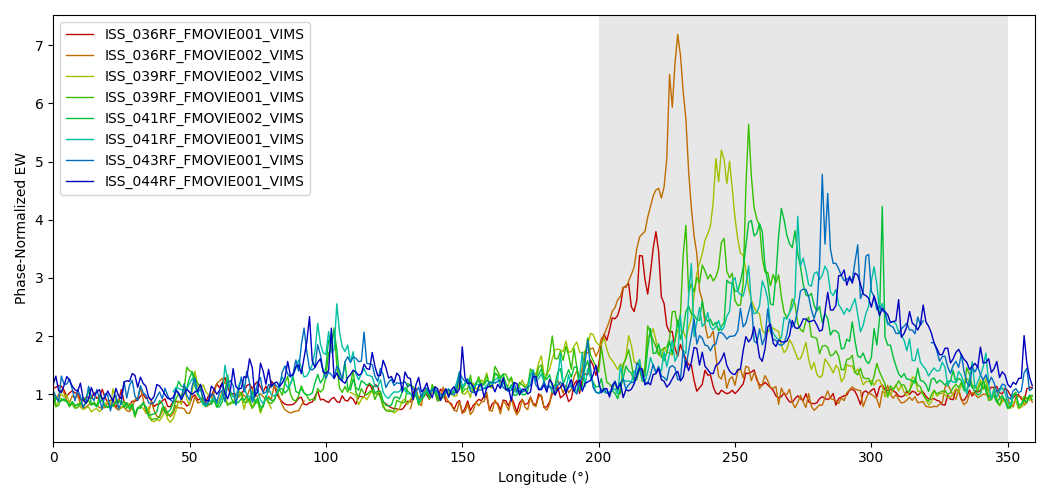

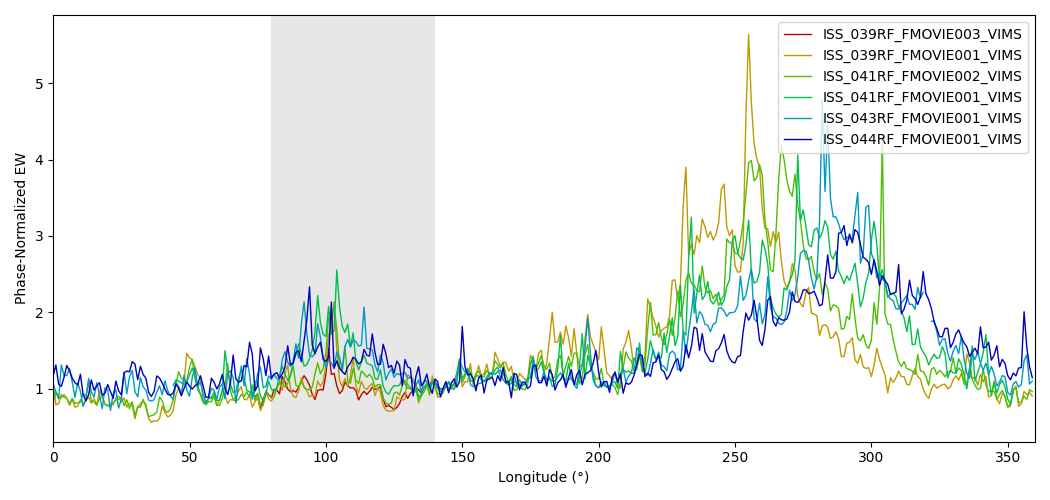

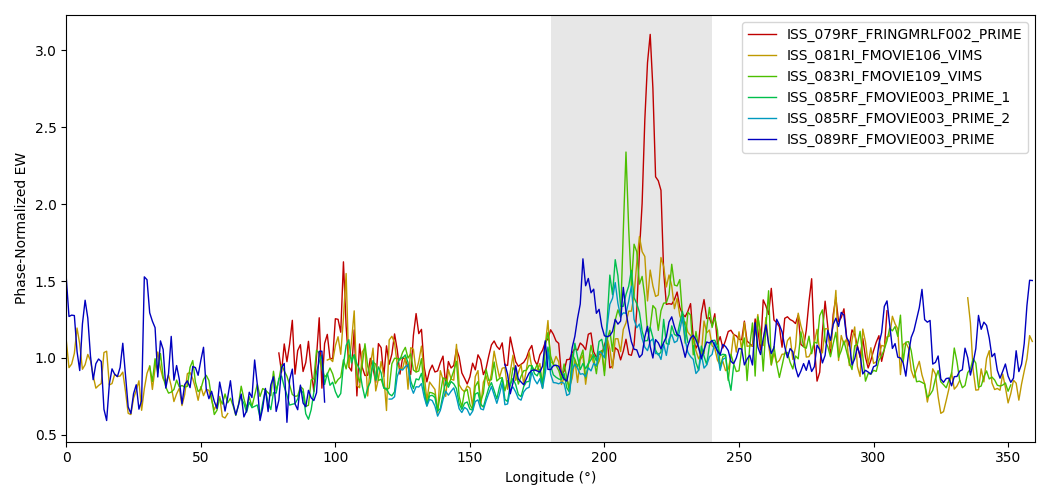

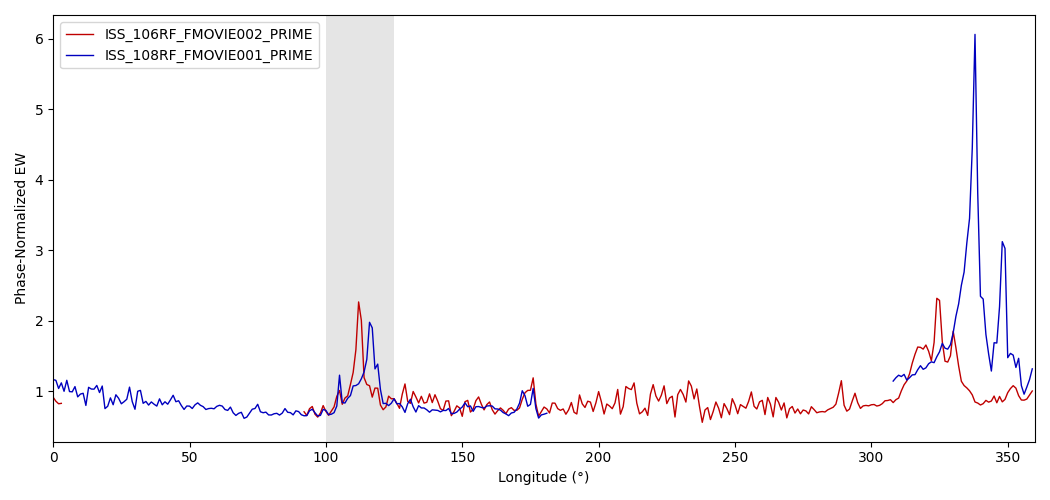

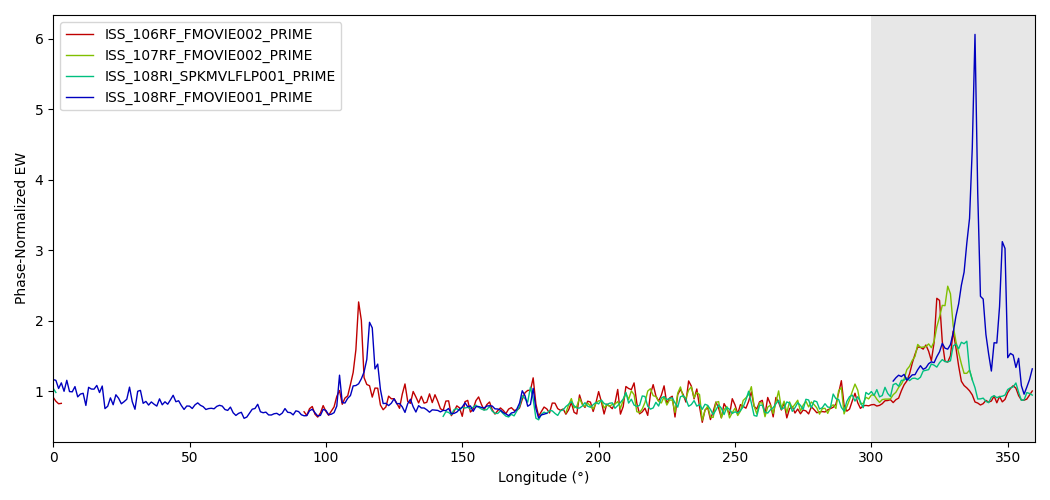

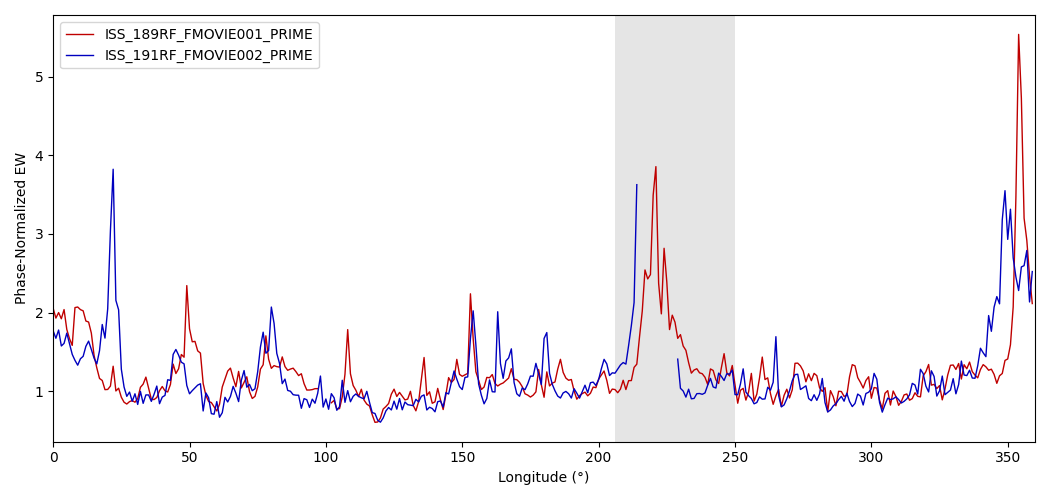

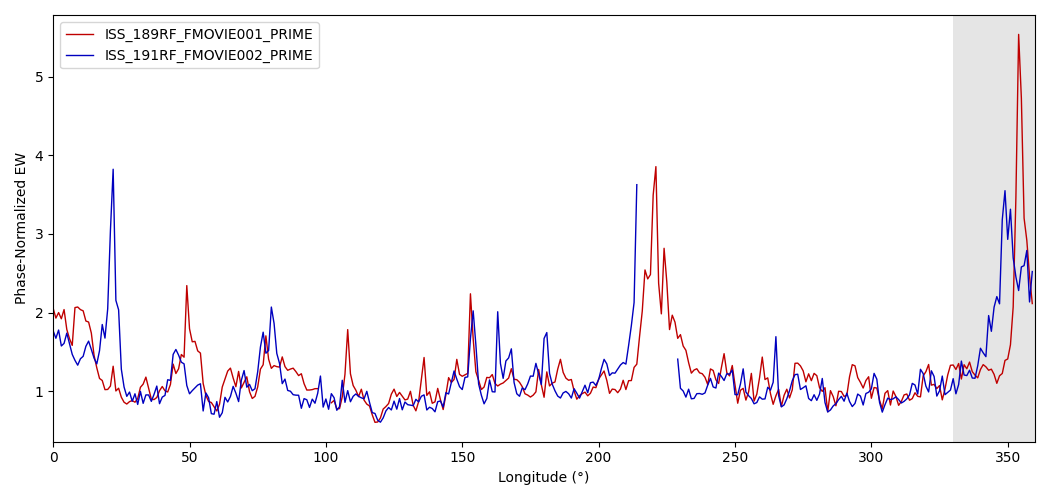

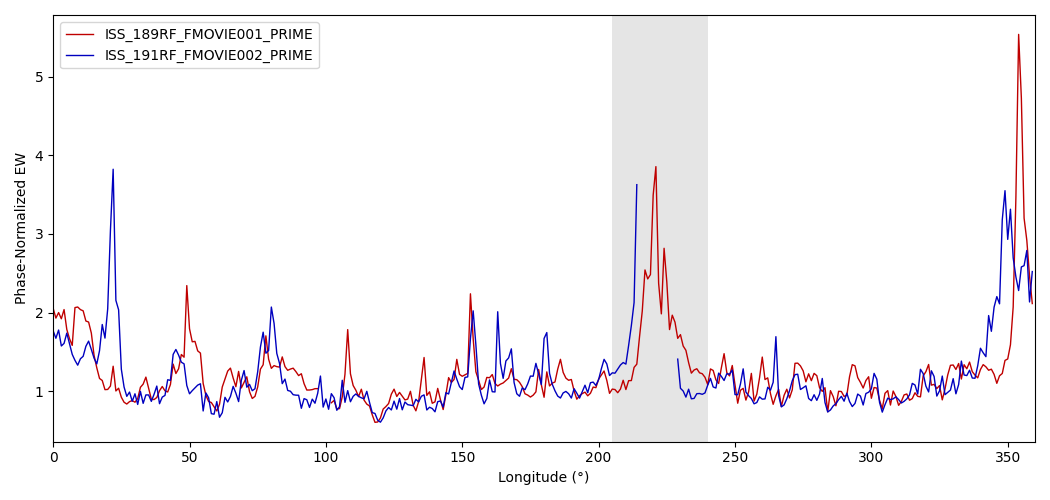

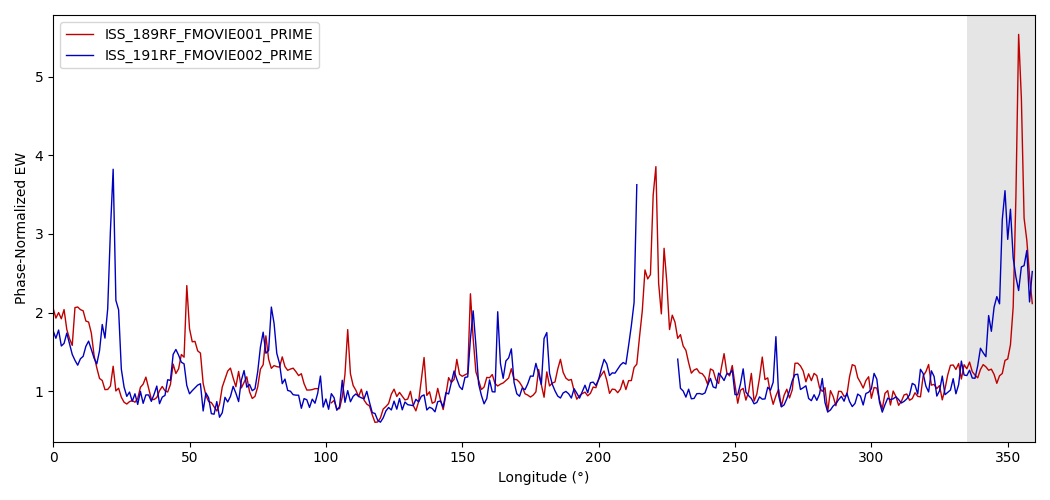

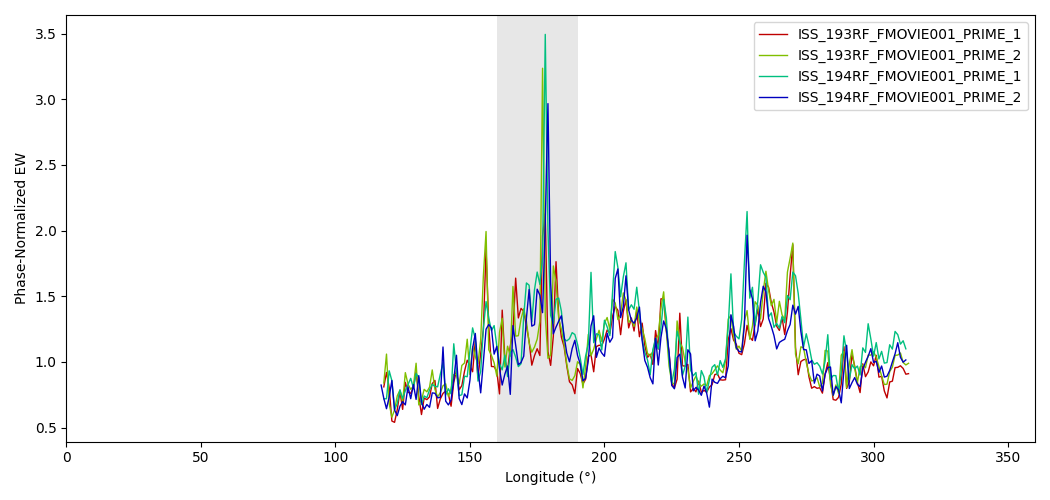

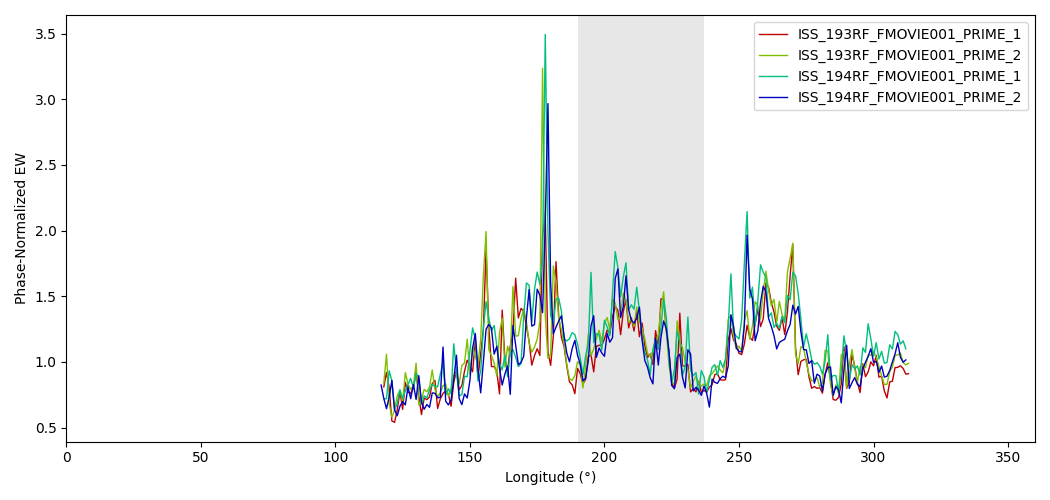

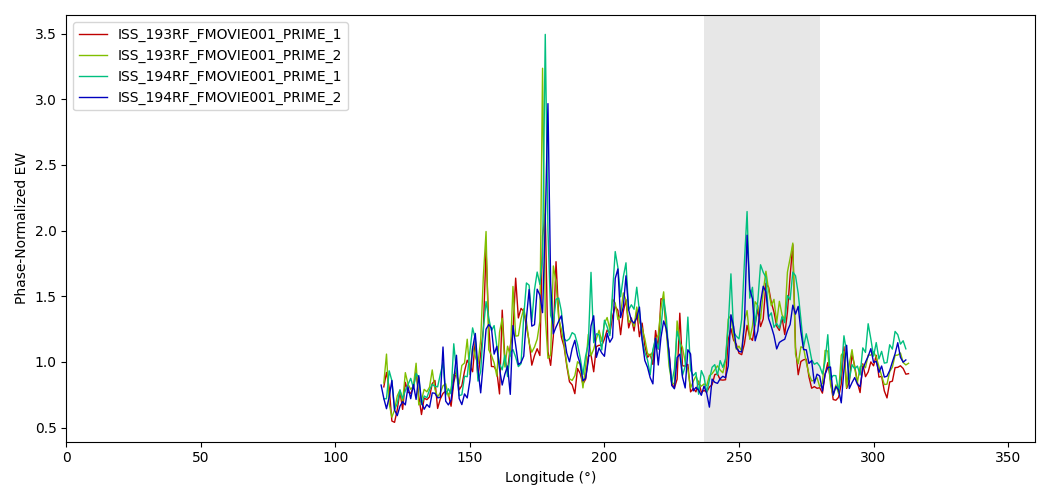

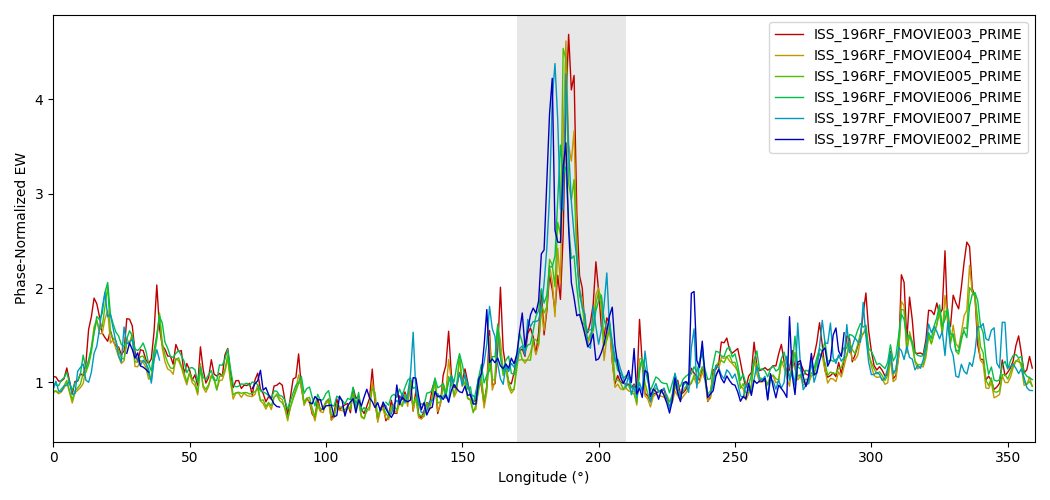

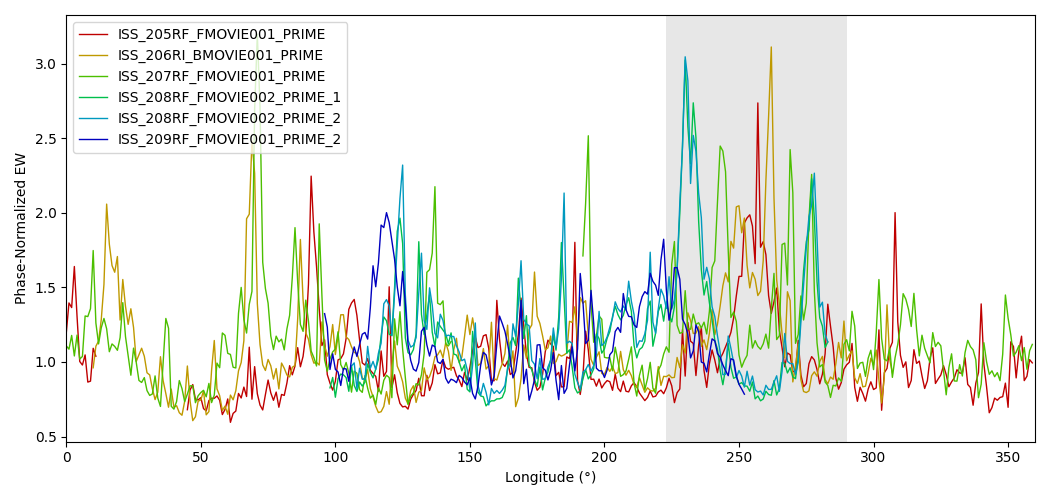

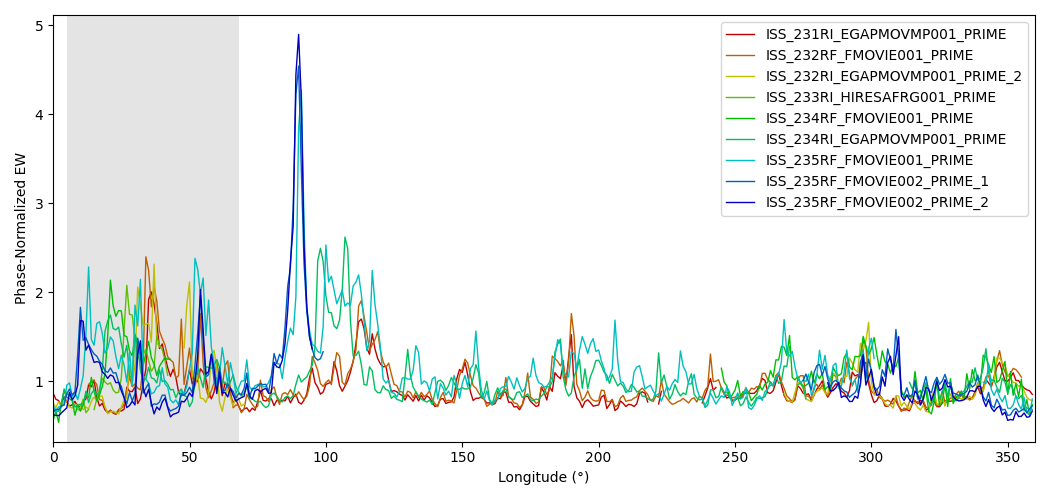

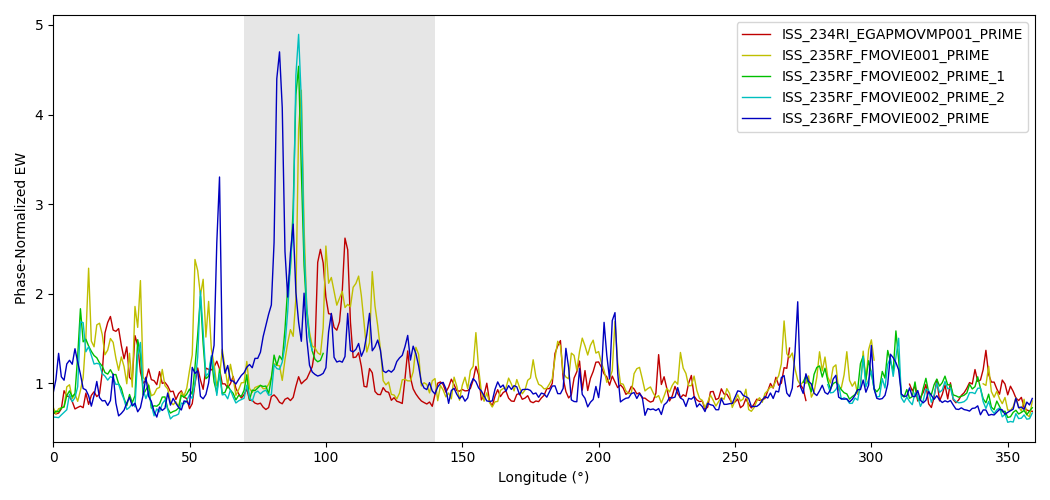

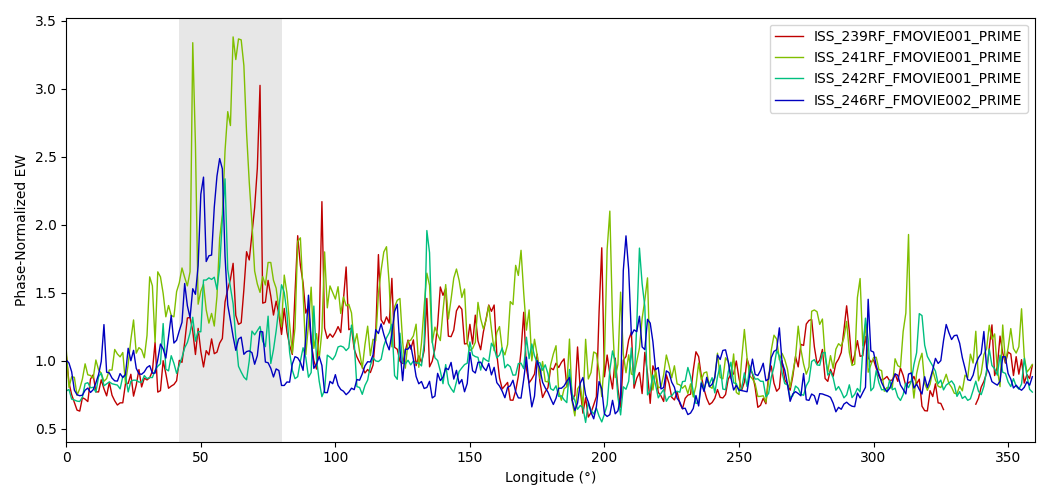

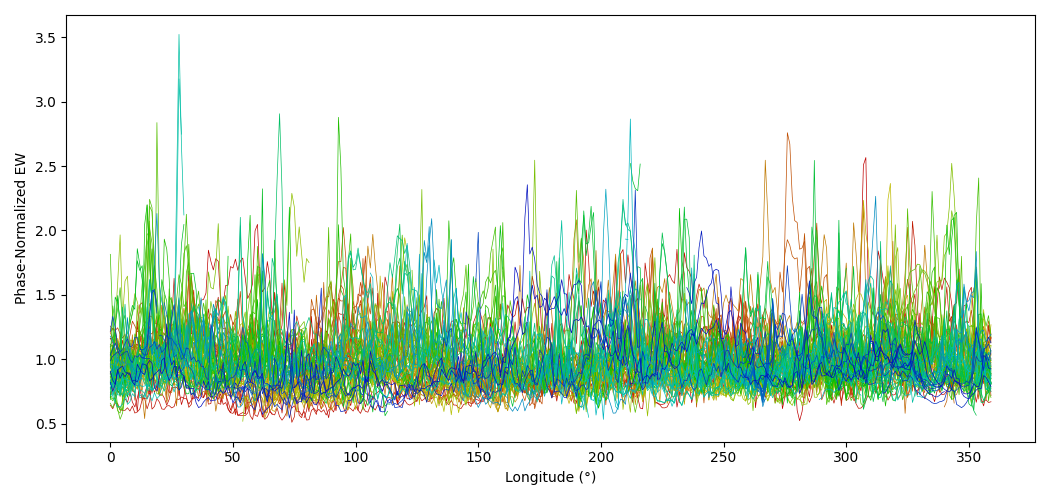

In [4]:
clumps = [
    (# This "Christmas Event of 2006"
     200, 350, (
        'ISS_036RF_FMOVIE001_VIMS', # Large fragmented moonlet
        'ISS_036RF_FMOVIE002_VIMS',
        'ISS_039RF_FMOVIE002_VIMS', # Obvious moonlet
        'ISS_039RF_FMOVIE001_VIMS', # Obvious moonlet
        'ISS_041RF_FMOVIE002_VIMS',
        'ISS_041RF_FMOVIE001_VIMS',
        'ISS_043RF_FMOVIE001_VIMS',
        'ISS_044RF_FMOVIE001_VIMS')),

    (# Secondary clump during Christmas Event
     80, 140, (
        'ISS_039RF_FMOVIE003_VIMS',
        'ISS_039RF_FMOVIE001_VIMS',
        'ISS_041RF_FMOVIE002_VIMS', # Obvious moonlet
        'ISS_041RF_FMOVIE001_VIMS',
        'ISS_043RF_FMOVIE001_VIMS',
        'ISS_044RF_FMOVIE001_VIMS')),

    (180, 240, (
        'ISS_079RF_FRINGMRLF002_PRIME', # Obvious moonlet
        # 'ISS_079RI_FMONITOR002_PRIME', Currently removed from photometry
        # 'ISS_081RI_FMONITOR001_PRIME', Currently removed from photometry
        'ISS_081RI_FMOVIE106_VIMS',
        # 'ISS_082RI_FMONITOR003_PRIME', Currently removed from photometry
        'ISS_083RI_FMOVIE109_VIMS',
        'ISS_085RF_FMOVIE003_PRIME_1', # Obvious moonlet
        'ISS_085RF_FMOVIE003_PRIME_2',
        'ISS_089RF_FMOVIE003_PRIME')),

    (100, 125, (
        'ISS_106RF_FMOVIE002_PRIME', # Obvious moonlet
        'ISS_108RF_FMOVIE001_PRIME',
    )),

    (300, 360, (
        'ISS_106RF_FMOVIE002_PRIME', # Obvious moonlet
        'ISS_107RF_FMOVIE002_PRIME', # Obvious moonlet
        'ISS_108RI_SPKMVLFLP001_PRIME',
        'ISS_108RF_FMOVIE001_PRIME',
        # 'ISS_109RI_TDIFS20HP001_CIRS', Currently removed from photometry
    )),

    (206, 250, (
        'ISS_189RF_FMOVIE001_PRIME',
        'ISS_191RF_FMOVIE002_PRIME')),

    (205, 240, (
        'ISS_189RF_FMOVIE001_PRIME',
        'ISS_191RF_FMOVIE002_PRIME')),
         
    (335, 360, (
        'ISS_189RF_FMOVIE001_PRIME',
        'ISS_191RF_FMOVIE002_PRIME')),
         
    (160, 190, (
        # Moonlet nearby ISS_184RF_FMOVIE002_PRIME
        'ISS_193RF_FMOVIE001_PRIME_1',
        'ISS_193RF_FMOVIE001_PRIME_2',
        'ISS_194RF_FMOVIE001_PRIME_1',
        'ISS_194RF_FMOVIE001_PRIME_2')),
         
    (190, 237, (
        'ISS_193RF_FMOVIE001_PRIME_1',
        'ISS_193RF_FMOVIE001_PRIME_2',
        'ISS_194RF_FMOVIE001_PRIME_1',
        'ISS_194RF_FMOVIE001_PRIME_2')),

    (237, 280, (
        'ISS_193RF_FMOVIE001_PRIME_1',
        'ISS_193RF_FMOVIE001_PRIME_2',
        'ISS_194RF_FMOVIE001_PRIME_1',
        'ISS_194RF_FMOVIE001_PRIME_2')),

    (170, 210, (
        'ISS_196RF_FMOVIE003_PRIME', # Lots of little moonlets
        'ISS_196RF_FMOVIE004_PRIME', # Moonlets
        'ISS_196RF_FMOVIE005_PRIME', # Moonlets
        'ISS_196RF_FMOVIE006_PRIME',
        'ISS_197RF_FMOVIE007_PRIME',
        'ISS_197RF_FMOVIE002_PRIME')),

    (223, 290, (
        #'ISS_202RF_FMOVIE001_PRIME_2',
        'ISS_205RF_FMOVIE001_PRIME',
        'ISS_206RI_BMOVIE001_PRIME',
        'ISS_207RF_FMOVIE001_PRIME',
        'ISS_208RF_FMOVIE002_PRIME_1',
        'ISS_208RF_FMOVIE002_PRIME_2', # Moonlet
        'ISS_209RF_FMOVIE001_PRIME_2',
        #'ISS_211RF_FMOVIE001_PRIME',
        #'ISS_211RF_HIRESFRNG001_PRIME',
        #'ISS_211RI_EGAPMOVMP001_PRIME',
        #'ISS_212RF_FMOVIE001_PRIME_1',
        #'ISS_212RF_FMOVIE001_PRIME_2',
        #'ISS_213RF_FMOVIE001_PRIME',
        #'ISS_213RF_FMOVIE002_PRIME'
        )),
        
    (5, 68, (
        'ISS_231RI_EGAPMOVMP001_PRIME',
        'ISS_232RF_FMOVIE001_PRIME',
        #'ISS_232RI_EGAPMOVMP001_PRIME_1',
        'ISS_232RI_EGAPMOVMP001_PRIME_2',
        'ISS_233RI_HIRESAFRG001_PRIME',
        'ISS_234RF_FMOVIE001_PRIME',
        'ISS_234RI_EGAPMOVMP001_PRIME',
        'ISS_235RF_FMOVIE001_PRIME', # Moonlet
        'ISS_235RF_FMOVIE002_PRIME_1',
        'ISS_235RF_FMOVIE002_PRIME_2')),       

    (70, 140, (
        'ISS_234RI_EGAPMOVMP001_PRIME',
        'ISS_235RF_FMOVIE001_PRIME', # Obvious moonlet
        'ISS_235RF_FMOVIE002_PRIME_1',
        'ISS_235RF_FMOVIE002_PRIME_2',
        'ISS_236RF_FMOVIE002_PRIME')),

    (42, 80, (
        'ISS_239RF_FMOVIE001_PRIME',
        'ISS_241RF_FMOVIE001_PRIME',
        'ISS_242RF_FMOVIE001_PRIME',
        'ISS_246RF_FMOVIE002_PRIME')),
        
]
cutoff1 = 100
cutoff2 = None
obsdata_limited = limit_by_quant(obsdata_0_1, cutoff1, cutoff2)
params_limited, _, _ = fit_hg_phase_function(2, None, obsdata_limited)
obsdata_0_1['Phase Model'] = hg_func(params_limited, obsdata_0_1['Mean Phase'])
obsdata_60_0['Phase Model'] = hg_func(params_limited, obsdata_60_0['Mean Phase'])
obsdata_0_1['PN EW Mean'] = obsdata_0_1['Normal EW Mean'] / obsdata_0_1['Phase Model']
obsdata_60_0['PN EW Mean'] = obsdata_60_0['Normal EW Mean'] / obsdata_60_0['Phase Model']
obsdata_0_1['PN EW Std'] = obsdata_0_1['Normal EW Std'] / obsdata_0_1['Phase Model']
obsdata_60_0['PN EW Std'] = obsdata_60_0['Normal EW Std'] / obsdata_60_0['Phase Model']
obsdata = obsdata_0_1.copy()
all_clump_obs = []
for min_long, max_long, clump_obs_list in clumps:
    all_clump_obs.extend(clump_obs_list)
    plt.figure()
    for n, clump_obs in enumerate(clump_obs_list):
        x, y = fill_in_missing_long(obsdata.loc[[clump_obs]]['Min Long'].to_numpy(),
                                    obsdata.loc[[clump_obs]]['PN EW Mean'].to_numpy())
        plt.plot(x, y, lw=1, label=clump_obs,
                 color=plot_color(n, len(clump_obs_list)))
        plt.axvspan(min_long, max_long, color='k', alpha=0.1/len(clump_obs_list), lw=0)
        plt.xlim(0,360)
    plt.legend()
    plt.xlabel('Longitude (°)')
    plt.ylabel('Phase-Normalized EW')
    plt.tight_layout()
obsdata_remain = obsdata.drop(set(all_clump_obs))
plt.figure()
obsdata_remain_grouped = obsdata_remain.groupby('Observation')
for n, (obs, data) in enumerate(obsdata_remain_grouped):
    x, y = fill_in_missing_long(data['Min Long'].to_numpy(), data['PN EW Mean'].to_numpy())
    plt.plot(x, y, lw=0.5, color=plot_color(n, len(obsdata_remain_grouped)))
plt.xlabel('Longitude (°)')
plt.ylabel('Phase-Normalized EW')
plt.tight_layout()

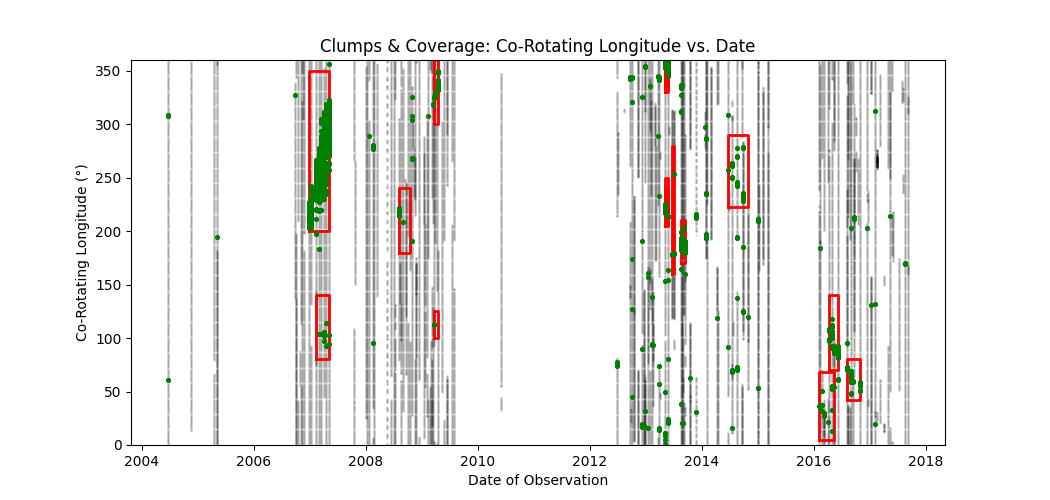

In [5]:
plt.figure()
obsdata_dim = obsdata_0_1[obsdata_0_1['PN EW Mean'] < 2]
obsdata_bright = obsdata_0_1[obsdata_0_1['PN EW Mean'] >= 2]
plt.plot(obsdata_dim['Date'], (obsdata_dim['Min Long']+obsdata_dim['Max Long'])/2, '.', color='black', ms=2, alpha=0.1)
plt.plot(obsdata_bright['Date'], (obsdata_bright['Min Long']+obsdata_bright['Max Long'])/2, '.', color='green', ms=5)
for min_long, max_long, clump_obs_list in clumps:
    min_date = obsdata_60_0.loc[clump_obs_list[0]]['Date']
    max_date = obsdata_60_0.loc[clump_obs_list[-1]]['Date']
    plt.plot([min_date, min_date, max_date, max_date, min_date], [min_long, max_long, max_long, min_long, min_long], '-', color='red', lw=2)
plt.plot(obsdata_bright['Date'], (obsdata_bright['Min Long']+obsdata_bright['Max Long'])/2, '.', color='green', ms=5)
plt.xlabel('Date of Observation')
plt.ylabel('Co-Rotating Longitude (°)')
plt.ylim(0,360)
_=plt.title('Clumps & Coverage: Co-Rotating Longitude vs. Date')

In [6]:
# Remaining observations that might have bright clumps
obsdata_remain_group = obsdata_remain.groupby('Observation')
obsdata_remain_max = obsdata_remain_group[['PN EW Mean']].max()
print(obsdata_remain_max[obsdata_remain_max['PN EW Mean'] > 2])

                                PN EW Mean
Observation                               
ISS_000RI_SATSRCHAP001_PRIME      2.566192
ISS_007RI_AZSCNLOPH001_PRIME      2.002907
ISS_029RF_FMOVIE001_VIMS          2.070936
ISS_057RF_FMOVIE001_VIMS          2.056781
ISS_059RF_FMOVIE001_VIMS          2.758831
ISS_091RF_FMOVIE003_PRIME         2.545180
ISS_103RF_FMOVIE003_PRIME         2.233800
ISS_105RF_FMOVIE002_PRIME         2.365183
ISS_168RF_FMOVIE001_PRIME         2.288166
ISS_172RF_FMOVIE001_PRIME         2.520817
ISS_172RI_EGAPMOVMP002_PRIME      2.545285
ISS_176RF_FMOVIE001_PRIME         2.837021
ISS_177RF_FMOVIE001_PRIME_1       2.188671
ISS_177RF_FMOVIE001_PRIME_2       2.241500
ISS_177RF_FRSTRCHAN001_PRIME_2    2.407208
ISS_179RF_FMOVIE001_PRIME         2.197880
ISS_180RF_FMOVIE001_PRIME         2.302298
ISS_181RF_FMOVIE001_PRIME         2.878215
ISS_181RF_FRINGPHOT001_VIMS       2.044319
ISS_184RF_FMOVIE001_PRIME         2.140211
ISS_184RF_FMOVIE002_PRIME         2.198643
ISS_197RI_W

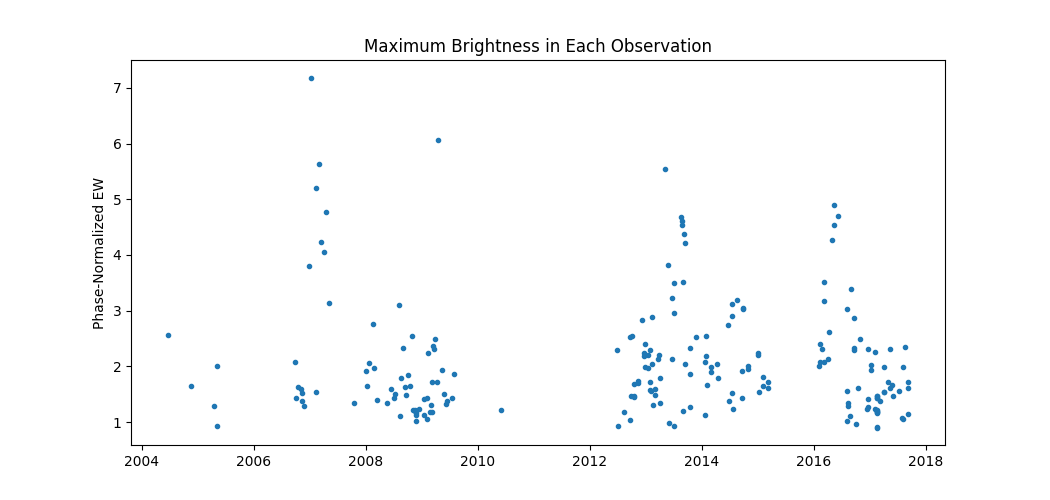

In [7]:
obsdata_group = obsdata_0_1.groupby('Observation')
obsdata_max = obsdata_group.max()
plt.figure()
plt.plot(obsdata_max['Date'], obsdata_max['PN EW Mean'], '.')
plt.ylabel('Phase-Normalized EW')
_=plt.title('Maximum Brightness in Each Observation')

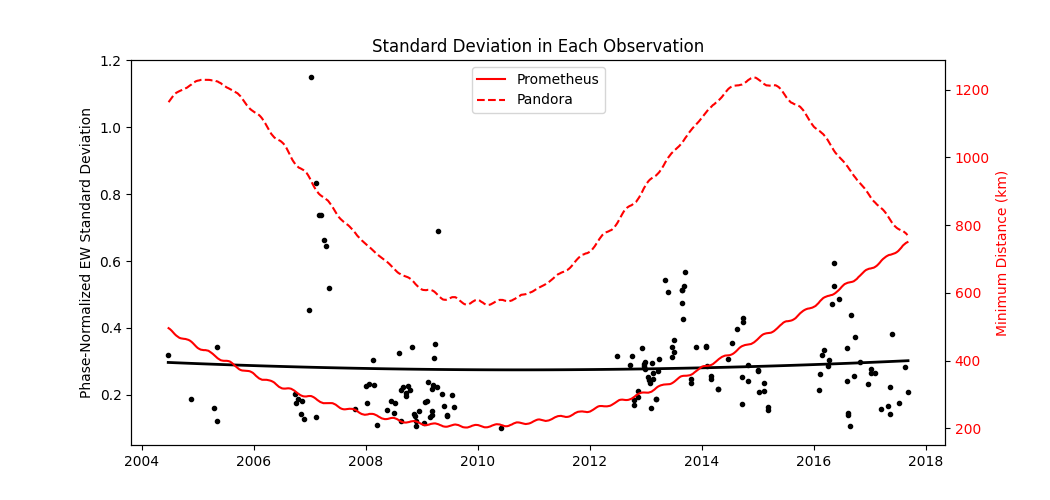

In [8]:
plt.figure()
ax1 = plt.gca()
ax2 = ax1.twinx()
min_date = obsdata_60_0['Date'].min()
max_date = obsdata_60_0['Date'].max()
prometheus_dist_lim = prometheus_dist[(prometheus_dist['Date'] >= min_date) & (prometheus_dist['Date'] <= max_date)]
pandora_dist_lim = pandora_dist[(pandora_dist['Date'] >= min_date) & (pandora_dist['Date'] <= max_date)]

min_date_days = obsdata_60_0['Date_days'].min()
max_date_days = obsdata_60_0['Date_days'].max()
ax1.plot(obsdata_60_0['Date_days'], obsdata_60_0['PN EW Std'], '.', color='black')
coeff = np.polyfit(obsdata_60_0['Date_days'], obsdata_60_0['PN EW Std'], 2)
xrange = np.linspace(min_date_days, max_date_days, 100, endpoint=True)
fit = np.polyval(coeff, xrange)
ax1.plot(xrange, fit, '-', lw=2, color='black')

ax1.set_ylabel('Phase-Normalized EW Standard Deviation', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2.plot(prometheus_dist_lim['Date'], prometheus_dist_lim['Prometheus Min Distance'], '-', color='red', label='Prometheus')
ax2.plot(pandora_dist_lim['Date'], pandora_dist_lim['Pandora Min Distance'], '--', color='red', label='Pandora')
ax2.set_ylabel('Minimum Distance (km)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.legend(loc='upper center')
_=plt.title('Standard Deviation in Each Observation')

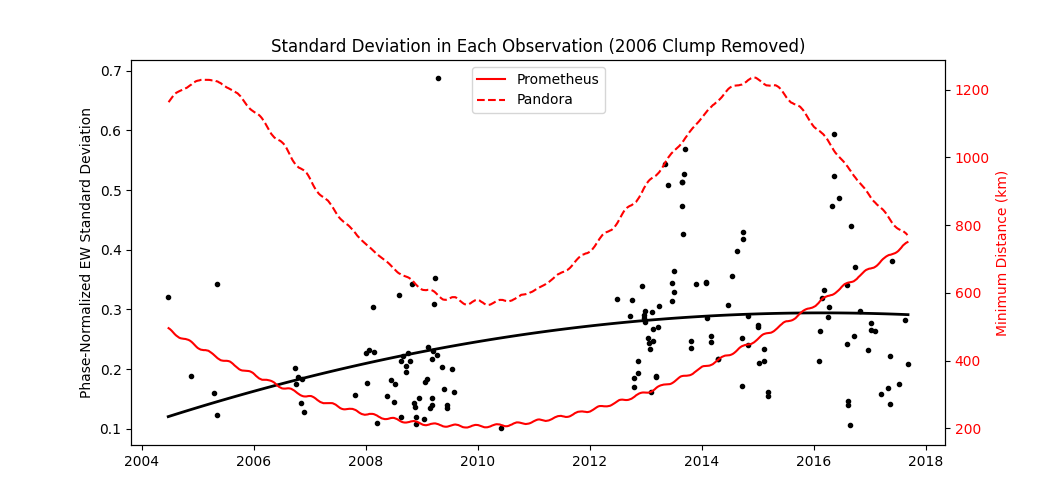

In [9]:
plt.figure()
ax1 = plt.gca()
ax2 = ax1.twinx()
obsdata_no_clump = obsdata_60_0[(obsdata_60_0['Date'] < '2006-12-20') | (obsdata_60_0['Date'] > '2007-05-07')]
min_date = obsdata_no_clump['Date'].min()
max_date = obsdata_no_clump['Date'].max()
prometheus_dist_lim = prometheus_dist[(prometheus_dist['Date'] >= min_date) & (prometheus_dist['Date'] <= max_date)]
pandora_dist_lim = pandora_dist[(pandora_dist['Date'] >= min_date) & (pandora_dist['Date'] <= max_date)]

min_date_days = obsdata_no_clump['Date_days'].min()
max_date_days = obsdata_no_clump['Date_days'].max()
ax1.plot(obsdata_no_clump['Date_days'], obsdata_no_clump['PN EW Std'], '.', color='black')
coeff = np.polyfit(obsdata_no_clump['Date_days'], obsdata_no_clump['PN EW Std'], 2)
xrange = np.linspace(min_date_days, max_date_days, 100, endpoint=True)
fit = np.polyval(coeff, xrange)
ax1.plot(xrange, fit, '-', lw=2, color='black')

ax1.set_ylabel('Phase-Normalized EW Standard Deviation', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2.plot(prometheus_dist_lim['Date'], prometheus_dist_lim['Prometheus Min Distance'], '-', color='red', label='Prometheus')
ax2.plot(pandora_dist_lim['Date'], pandora_dist_lim['Pandora Min Distance'], '--', color='red', label='Pandora')
ax2.set_ylabel('Minimum Distance (km)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.legend(loc='upper center')
_=plt.title('Standard Deviation in Each Observation (2006 Clump Removed)')

<div class="alert alert-info">
<h2>Conclusion</h2>

<b>9 out of 16 clumps have obvious moonlets.

There is no evidence of change in the rate of clump occerrence during the Cassini mission.</b>
</div>
